# Explore the data, and check if there is something weird

In [60]:
import pandas as pd
weather = pd.read_csv('austin_weather.csv')

weather.head(5)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [61]:
weather.shape

(1319, 21)

In [62]:
weather.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [63]:
weather.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [64]:
weather['DewPointHighF'].unique()

array(['67', '43', '31', '36', '44', '39', '41', '49', '51', '37', '55',
       '54', '15', '29', '60', '64', '58', '28', '42', '22', '38', '45',
       '19', '59', '62', '40', '17', '53', '34', '48', '52', '61', '63',
       '33', '57', '65', '46', '32', '50', '27', '56', '47', '68', '69',
       '66', '70', '73', '71', '76', '72', '75', '74', '-', '77', '23',
       '35', '30', '79', '78', '80', '26', '18', '25', '13'], dtype=object)

In [65]:
# Replace the dash -> np.NaN
# Set correct datatype for each column... depenpending on the column
# change the date
import numpy as np

def fixIntegers(column):
    transformed_column = column.replace( '-' , -99999 )
    transformed_column = transformed_column.apply( lambda text : int(text) )
    return transformed_column
    
def fixFloats(column):
    chars_to_be_replaced='-T'
    transformed_column=column
    for each_char in chars_to_be_replaced:
        transformed_column = transformed_column.replace( each_char , np.NaN )
    transformed_column = transformed_column.apply( lambda text : float(text) )
    return transformed_column

#def fixFloatsWithChar(column, char_to_be_replaced):
#    transformed_column = column.replace( char_to_be_replaced , np.NaN )
#    transformed_column = transformed_column.apply( lambda text : float(text) )
#    return transformed_column

def fixDates(column):
    return pd.to_datetime(column)

##### Start fixing

######### INT COLUMNS
for each_column_name in weather.loc[ : , 'TempHighF':'HumidityLowPercent'].columns:
    weather[each_column_name] = fixIntegers( weather[each_column_name] )

for each_column_name in weather.loc[ : , 'VisibilityHighMiles':'WindGustMPH'].columns:
    weather[each_column_name] = fixIntegers( weather[each_column_name] )

######### FLOAT COLUMNS
float_columns=['SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'PrecipitationSumInches'] 
for each_column_name in float_columns:
    weather[each_column_name] = fixFloats( weather[each_column_name] )

######### DATE COLUMNS
weather['Date'] = fixDates(weather['Date'])


In [66]:
weather.dtypes


Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                          int64
DewPointAvgF                           int64
DewPointLowF                           int64
HumidityHighPercent                    int64
HumidityAvgPercent                     int64
HumidityLowPercent                     int64
SeaLevelPressureHighInches           float64
SeaLevelPressureAvgInches            float64
SeaLevelPressureLowInches            float64
VisibilityHighMiles                    int64
VisibilityAvgMiles                     int64
VisibilityLowMiles                     int64
WindHighMPH                            int64
WindAvgMPH                             int64
WindGustMPH                            int64
PrecipitationSumInches               float64
Events                                object
dtype: object

In [59]:
# Example looking for INVALID VALUES
invalidValues={}

def lookForInvalidValues(value):
    global invalidValues
    try:
        float(value)
    except:
        invalidValues[value]=0

weather['PrecipitationSumInches'].apply(lookForInvalidValues)
list(invalidValues.keys())

[]

In [100]:
import re 

def differentWordsInColumn(column):
    tokens=[]
    for each_set_of_tokens in column.unique():
        splitted_tokens=re.split(r'\W+', each_set_of_tokens)  
        tokens+=splitted_tokens

    tokens = pd.DataFrame(tokens)[0].unique().tolist()

    #tokens=tokens[tokens != '']
    #
    tokens.remove('')
    return tokens

words= differentWordsInColumn(weather['Events'])
words

['Rain', 'Thunderstorm', 'Fog', 'Snow']

In [102]:
for word in words:
    weather[word]=weather['Events'].apply( lambda text : bool(re.match( '^.*'+word, text )) )
weather

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,Rain,Thunderstorm,Fog,Snow
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,2,20,4,31,0.46,"Rain , Thunderstorm",True,True,False,False
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,5,16,6,25,0.00,,False,False,False,False
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,10,8,3,12,0.00,,False,False,False,False
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,7,12,4,20,0.00,,False,False,False,False
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,7,10,2,16,NaN,,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,10,12,5,21,0.00,,False,False,False,False
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,10,14,5,20,0.00,,False,False,False,False
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,10,12,4,17,0.00,,False,False,False,False
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,10,13,4,20,0.00,,False,False,False,False


In [103]:
weather.drop('Events', inplace=True, axis=1)
weather

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Rain,Thunderstorm,Fog,Snow
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,7,2,20,4,31,0.46,True,True,False,False
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,10,5,16,6,25,0.00,False,False,False,False
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,10,10,8,3,12,0.00,False,False,False,False
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,10,7,12,4,20,0.00,False,False,False,False
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,10,7,10,2,16,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,10,10,12,5,21,0.00,False,False,False,False
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,10,10,14,5,20,0.00,False,False,False,False
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,10,10,12,4,17,0.00,False,False,False,False
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,10,10,13,4,20,0.00,False,False,False,False


<AxesSubplot:>

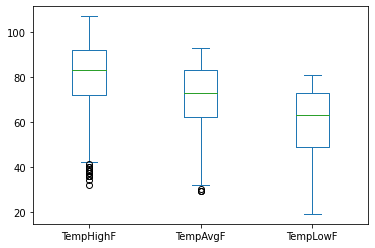

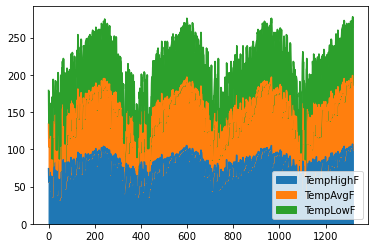

In [114]:
import matplotlib.pyplot as plt
weather.loc[ : , 'TempHighF':'TempLowF' ].plot.box(subplots=False)
weather.loc[ : , 'TempHighF':'TempLowF' ].plot.area(subplots=False)

<AxesSubplot:xlabel='TempHighF', ylabel='TempLowF'>

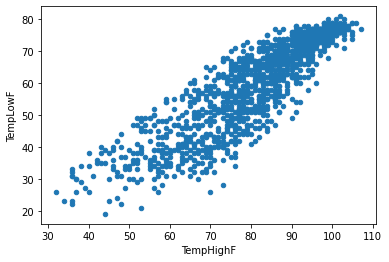

In [115]:
weather.plot.scatter( x = 'TempHighF', y = 'TempLowF')